# 1. Import libraries 

In [1]:
import csv 
import pandas as pd
import seaborn as sns

# 2. Loading data

Data downloaded from Metrics for Reddit https://frontpagemetrics.com/list-all-subreddits

In [2]:
df = pd.read_csv("data/2021-09-10.csv")
df.head()

,real_name,desc,created_date,subs
0,pics,A place for pictures and photographs.,2008-01-24,27961080
1,funny,"Welcome to r/Funny, Reddit&#039;s largest humo...",2008-01-25,37288902
2,politics,/r/Politics is for news and discussion about U...,2007-08-06,7707316
3,gaming,A subreddit for (almost) anything related to g...,2007-09-17,30515341
4,AskReddit,r/AskReddit is the place to ask and answer tho...,2008-01-24,33508969


In [3]:
dfp = df.groupby("created_date").agg({'real_name':'count'})
dfp = dfp.drop('0000-00-00')
dfp.columns = ['subrds']
dfp.head()

,subrds
created_date,
2006-01-17,1
2006-01-19,1
2006-02-19,3
2006-02-20,6
2006-02-22,14


In [4]:
dfp.index = pd.to_datetime(dfp.index, format='%Y-%m-%d')
g = dfp.groupby(pd.Grouper(freq="M"))
g.sum()

,subrds
created_date,
2006-01-31,2
2006-02-28,24
2006-03-31,4
2006-04-30,5
2006-05-31,1
...,...
2021-05-31,85843
2021-06-30,87366
2021-07-31,62345


In [5]:
dfp['balance'] = dfp['subrds'].cumsum()
dfp.head()

,subrds,balance
created_date,,
2006-01-17,1,1
2006-01-19,1,2
2006-02-19,3,5
2006-02-20,6,11
2006-02-22,14,25


In [6]:
dfp[dfp.balance >= 2000000]

,subrds,balance
created_date,,
2020-03-20,3208,2002879
2020-03-21,2640,2005519
2020-03-22,2591,2008110
2020-03-23,2619,2010729
2020-03-24,2432,2013161
...,...,...
2021-09-05,616,3082447
2021-09-06,3262,3085709
2021-09-07,3446,3089155


<AxesSubplot:xlabel='created_date', ylabel='balance'>

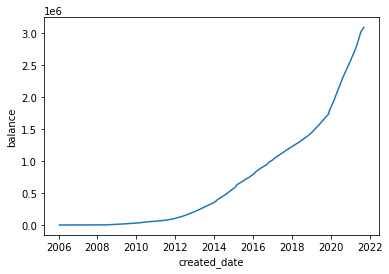

In [7]:
sns.lineplot(x="created_date", y="balance", data=dfp)

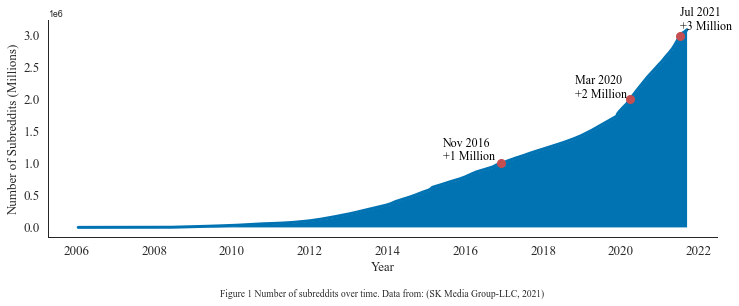

In [81]:
import matplotlib.pyplot as plt
from datetime import datetime

sns.set_palette("colorblind")
sns.set_style("white")
sns.set_context("paper")

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

style = dict(size=12, color='black', fontname='Times New Roman')
fig, ax = plt.subplots(figsize=(12, 4))

ax.fill_between(dfp.index, dfp['balance'])
ax.plot(dfp.index, dfp['balance'], linewidth=3)
ax.plot(datetime.strptime('2016-11-29', '%Y-%m-%d'), 1000444,'ro', markersize=8) 
ax.plot(datetime.strptime('2020-03-20', '%Y-%m-%d'), 2002879,'ro', markersize=8) 
ax.plot(datetime.strptime('2021-07-08', '%Y-%m-%d'), 3000690,'ro', markersize=8) 
ax.text(datetime.strptime('2015-05-31', '%Y-%m-%d'), 1052450, "Nov 2016\n+1 Million", **style)
ax.text(datetime.strptime('2018-10-20', '%Y-%m-%d'), 2033000, "Mar 2020\n+2 Million", **style)
ax.text(datetime.strptime('2021-07-08', '%Y-%m-%d'), 3093130, "Jul 2021\n+3 Million", **style)

plt.tick_params(labelsize=13)
plt.xlabel('Year', size=13, **hfont)
plt.ylabel('Number of Subreddits (Millions)', size=13, **hfont)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Figure 1 Number of subreddits over time. Data from: (SK Media Group-LLC, 2021)', y=-.3, **csfont)


for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
plt.savefig("img/NoSubreddits.jpg", dpi=300, bbox_inches="tight")
plt.show()
